## Observations and Insights 

1) Capomulin has demonstrated a steady reduction in Tumor Volume in some mice.  <br>
2) The sample population represents both sexex almost equally <br>
3) Average Tumor Volume (mm3) has a strong positive correlation with Mouse Weight (g) <br>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_md = pd.read_csv(mouse_metadata_path)
study_res = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_md, study_res, how ='inner', on ='Mouse ID')
mouse_study.columns = ['m_id', 'drug_reg', 'sex', 'age_mon', 'weight_g', 'timepoint', 'tumorvol_mm3', 'metastatic_sites']

# Display the data table for preview
mouse_study.head(20)

,m_id,drug_reg,sex,age_mon,weight_g,timepoint,tumorvol_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
mouse_study.shape

(1893, 8)

In [3]:
# Checking the number of mice.

#Sort by Mouse ID then Timepoint

mouse_study.sort_values(['m_id','timepoint'], ascending = False) 

#Count and Call Unique values

mouse_num = mouse_study['m_id'].nunique()
mouse_num

249

In [4]:
#Modify data to use Mouse ID as index

mouse_index = mouse_study.set_index("m_id", drop = False)
mouse_index

,m_id,drug_reg,sex,age_mon,weight_g,timepoint,tumorvol_mm3,metastatic_sites
m_id,,,,,,,,
k403,k403,Ramicane,Male,21,16,0,45.000000,0
k403,k403,Ramicane,Male,21,16,5,38.825898,0
k403,k403,Ramicane,Male,21,16,10,35.014271,1
k403,k403,Ramicane,Male,21,16,15,34.223992,1
k403,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
z969,z969,Naftisol,Male,9,30,25,63.145652,2
z969,z969,Naftisol,Male,9,30,30,65.841013,3
z969,z969,Naftisol,Male,9,30,35,69.176246,4


In [5]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicatemice = mouse_study[mouse_study.duplicated()]
duplicatemice

,m_id,drug_reg,sex,age_mon,weight_g,timepoint,tumorvol_mm3,metastatic_sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_index.loc["g989",:]

,m_id,drug_reg,sex,age_mon,weight_g,timepoint,tumorvol_mm3,metastatic_sites
m_id,,,,,,,,
g989,g989,Propriva,Female,21,26,0,45.000000,0
g989,g989,Propriva,Female,21,26,0,45.000000,0
g989,g989,Propriva,Female,21,26,5,48.786801,0
g989,g989,Propriva,Female,21,26,5,47.570392,0
g989,g989,Propriva,Female,21,26,10,51.745156,0
g989,g989,Propriva,Female,21,26,10,49.880528,0
g989,g989,Propriva,Female,21,26,15,51.325852,1
g989,g989,Propriva,Female,21,26,15,53.442020,0
g989,g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_indcln = mouse_study[mouse_study.m_id != 'g989']
mouse_indcln

,m_id,drug_reg,sex,age_mon,weight_g,timepoint,tumorvol_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_numcln = mouse_indcln['m_id'].nunique()
mouse_numcln

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mse_mean = mouse_indcln[["drug_reg", "tumorvol_mm3"]].groupby("drug_reg").mean()
mse_median = mouse_indcln[["drug_reg", "tumorvol_mm3"]].groupby("drug_reg").median()
mse_var = mouse_indcln[["drug_reg", "tumorvol_mm3"]].groupby("drug_reg").var()
mse_sd = mouse_indcln[["drug_reg", "tumorvol_mm3"]].groupby("drug_reg").std()
mse_sem = mouse_indcln[["drug_reg", "tumorvol_mm3"]].groupby("drug_reg").sem()

sum1_df = pd.merge(mse_mean, mse_median, on = "drug_reg")
sum1_df = pd.merge(sum1_df, mse_var, on = "drug_reg")
sum1_df = pd.merge(sum1_df, mse_sd, on = "drug_reg")
sum1_df = pd.merge(sum1_df, mse_sem, on = "drug_reg")
sum1_df = sum1_df.round(2)
sum1_df.columns = ['Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)', 'Variance (mm3)', 'Standard Deviation', 'Standard Error of Mean']
# This method is the most straighforward, creating multiple series and putting them all together at the end.

sum1_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance (mm3),Standard Deviation,Standard Error of Mean
drug_reg,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

sum2_df = mouse_indcln.groupby('drug_reg').agg({'tumorvol_mm3':['mean','median','var','std','sem']})
sum2_df = sum2_df.round(2)
sum2_df.columns = ['Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)', 'Variance (mm3)', 'Standard Deviation', 'Standard Error of Mean']

# This method produces everything in a single groupby function

sum2_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance (mm3),Standard Deviation,Standard Error of Mean
drug_reg,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [11]:
mouse_indcln.drug_reg.unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
#Create Data Set - Count of Mice per Drug Regimen
drug_ct = mouse_indcln.drug_reg.value_counts()

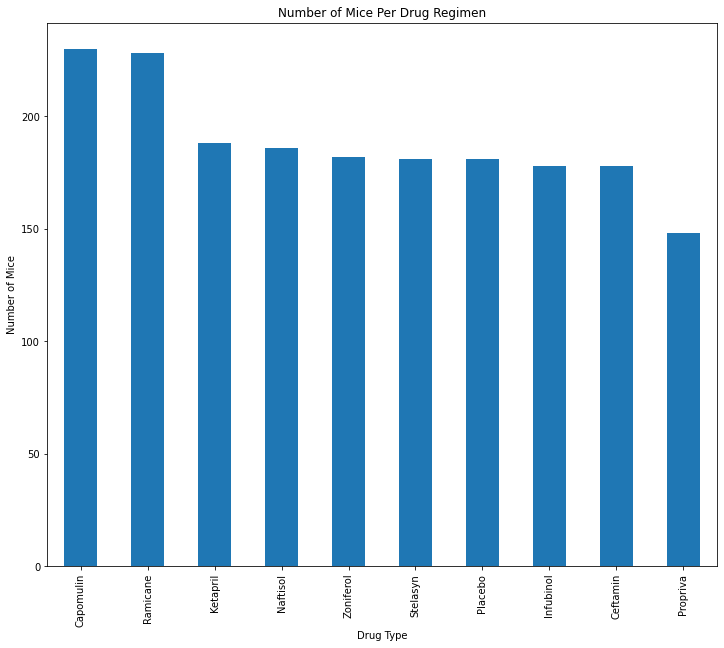

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_ctdf = pd.DataFrame(drug_ct)
drug_ctdf.columns = ['Total Number of Mice']
drug_ctdf.plot.bar(figsize = (12,10), legend= False)
plt.xlabel('Drug Type')
plt.ylabel('Number of Mice')
plt.title("Number of Mice Per Drug Regimen")
plt.show()

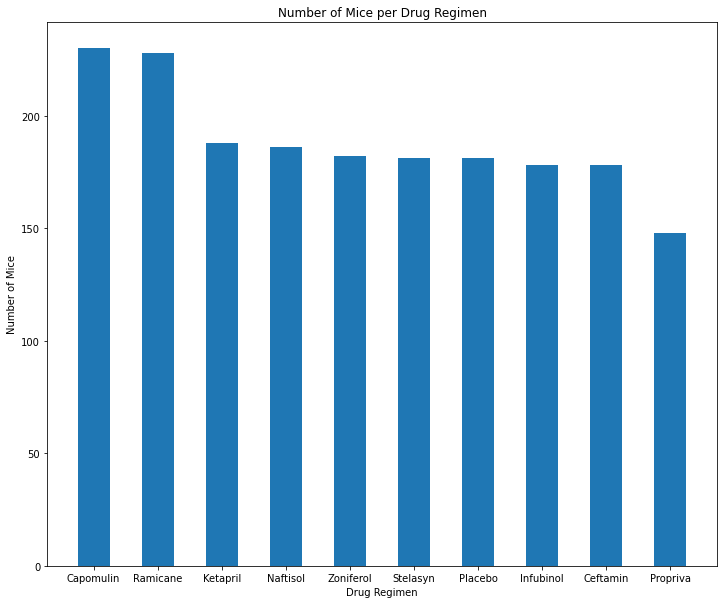

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using matplotlib

x_axis = (drug_ctdf.index.values)
y_axis = list(drug_ct)
plt.figure(figsize=(12,10))
plt.bar(x_axis, y_axis, align = "center" , width= 0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen')
plt.show()

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

In [15]:
#Create data for plots - Count Sex

sex_ct = mouse_indcln.sex.value_counts()

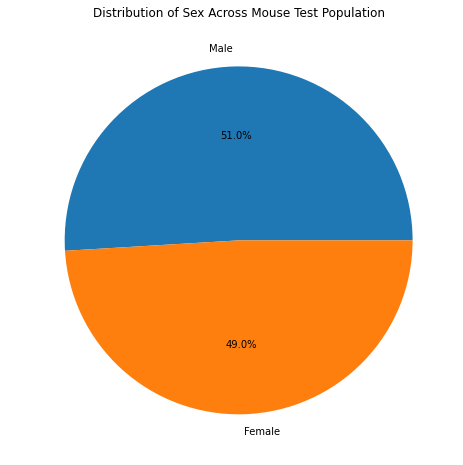

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_ctdf = pd.DataFrame(sex_ct)
sex_ctdf.columns = [" "]
sex_ctdf.plot.pie(subplots = True, figsize=(8, 8), legend = False, autopct='%1.1f%%')
plt.title("Distribution of Sex Across Mouse Test Population")
plt.show()

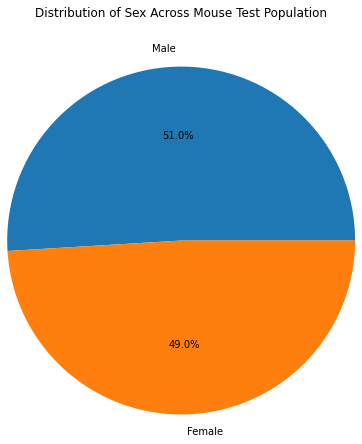

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_ct, labels=['Male','Female'], radius = 2, autopct='%1.1f%%')
plt.title("Distribution of Sex Across Mouse Test Population", y = 1.5)
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
mouse_indcln.timepoint.unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_cut = mouse_indcln[mouse_indcln["drug_reg"].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
mouse_cut2 = mouse_cut.groupby('m_id').agg({'timepoint':['last'],'tumorvol_mm3':['last'],'weight_g':["last"],'drug_reg':["last"]})
mouse_cut2.columns = ['timepoint', 'tumorvol_mm3', 'weight_g', 'drug_reg']
mouse_cut2
# Start by getting the last (greatest) timepoint for each mouse

,timepoint,tumorvol_mm3,weight_g,drug_reg
m_id,,,,
a203,45,67.973419,23,Infubinol
a251,45,65.525743,25,Infubinol
a275,45,62.999356,28,Ceftamin
a411,45,38.407618,22,Ramicane
a444,45,43.047543,25,Ramicane
...,...,...,...,...
y769,45,68.594745,27,Ceftamin
y793,45,31.896238,17,Capomulin
y865,45,64.729837,26,Ceftamin


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
tumor_vol = mouse_cut2.tumorvol_mm3.values.tolist()
tumor_vol.sort(reverse=False)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

q1 = np.median(tumor_vol[:50])
q3 = np.median(tumor_vol[50:])
iqr = q3 - q1
out = sum(i <= q1 or i >= q3 for i in tumor_vol)

# Print Summary

sum_statcal = [q1, q3, iqr, out]
statcal_df = pd.DataFrame(sum_statcal, index = ['Q1','Q3','IQR','Outliers'])
statcal_df = statcal_df.round(2)
statcal_df.columns= [' ']
print(statcal_df)

               
Q1        37.15
Q3        60.01
IQR       22.86
Outliers  50.00


In [66]:
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_df = mouse_cut2[mouse_cut2.drug_reg == 'Capomulin']
ramicane_df = mouse_cut2[mouse_cut2.drug_reg == 'Ramicane']
infubinol_df = mouse_cut2[mouse_cut2.drug_reg == 'Infubinol']
ceftamin_df = mouse_cut2[mouse_cut2.drug_reg == 'Ceftamin']

#Create Lists

cap_lst = capomulin_df.tumorvol_mm3.values.tolist()
ram_lst = ramicane_df.tumorvol_mm3.values.tolist()
inf_lst = infubinol_df.tumorvol_mm3.values.tolist()
cef_lst = ceftamin_df.tumorvol_mm3.values.tolist()

#Sort in ascending

cap_lst.sort(reverse=False)
ram_lst.sort(reverse=False)
inf_lst.sort(reverse=False)
cef_lst.sort(reverse=False)

# add subset 
        
# Determine outliers using upper and lower bounds

caq1 = np.median(cap_lst[:12])
caq3 = np.median(cap_lst[12:])
caiqr = caq3 - caq1
caout = sum(i <= caq1 or i >= caq3 for i in cap_lst)

raq1 = np.median(ram_lst[:12])
raq3 = np.median(ram_lst[12:])
raiqr = raq3 - raq1
raout = sum(i <= raq1 or i >= raq3 for i in ram_lst)

inq1 = np.median(inf_lst[:12])
inq3 = np.median(inf_lst[12:])
iniqr = inq3 - inq1
inout = sum(i <= inq1 or i >= inq3 for i in inf_lst)

ceq1 = np.median(cef_lst[:12])
ceq3 = np.median(cef_lst[12:])
ceiqr = ceq3 - ceq1
ceout = sum(i <= ceq1 or i >= ceq3 for i in cef_lst)

ca_sum = [caq1, caq3, caiqr, caout]
ra_sum = [raq1, raq3, raiqr, raout]
in_sum = [inq1, inq3, iniqr, inout]
ce_sum = [ceq1, ceq3, ceiqr, ceout]

tot_sum = [ca_sum, ra_sum, in_sum, ce_sum]

tot_sum_df = pd.DataFrame(tot_sum, index = ['Capomulin','Ramicane','Infubinol','Ceftamin'])
tot_sum_df.columns = ['Q1', 'Q3', 'IQR', 'Number of Outliers']
tot_sum_df

,Q1,Q3,IQR,Number of Outliers
Capomulin,32.136798,40.159220,8.022423,13
Ramicane,31.327902,40.659006,9.331104,13
Infubinol,52.795519,65.525743,12.730224,13
Ceftamin,48.253380,64.299830,16.046450,13


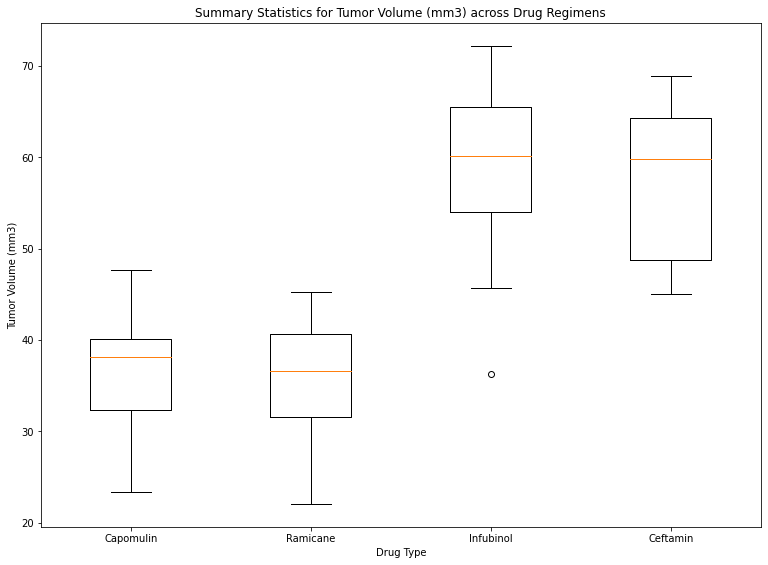

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drugdata = [cap_lst, ram_lst, inf_lst, cef_lst] 
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(drugdata, labels = treatments) 
  
# show plot 
plt.title("Summary Statistics for Tumor Volume (mm3) across Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Type")
plt.show()


## Line and Scatter Plots

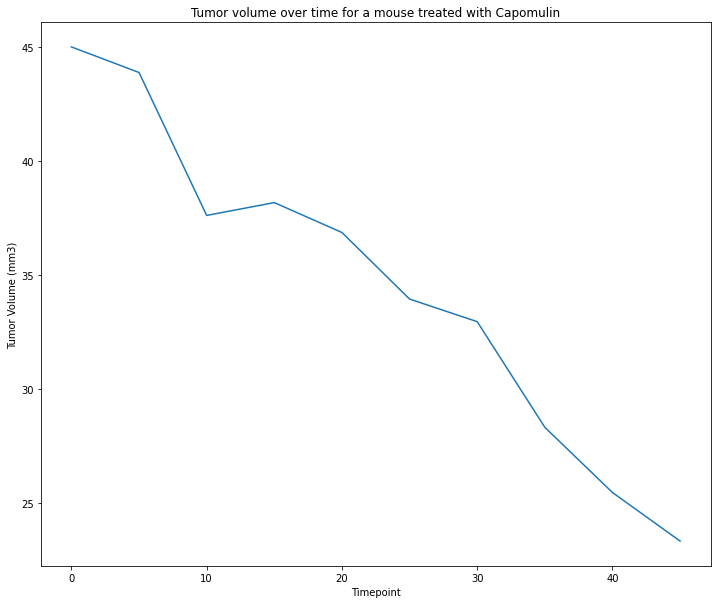

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin = mouse_study[mouse_study.m_id == 's185']
mouse_capomulin

mcx_axis = (mouse_capomulin.timepoint.values)
mcy_axis = (mouse_capomulin.tumorvol_mm3.values)

plt.figure(figsize=(12,10))
plt.plot(mcx_axis, mcy_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor volume over time for a mouse treated with Capomulin')
plt.show()

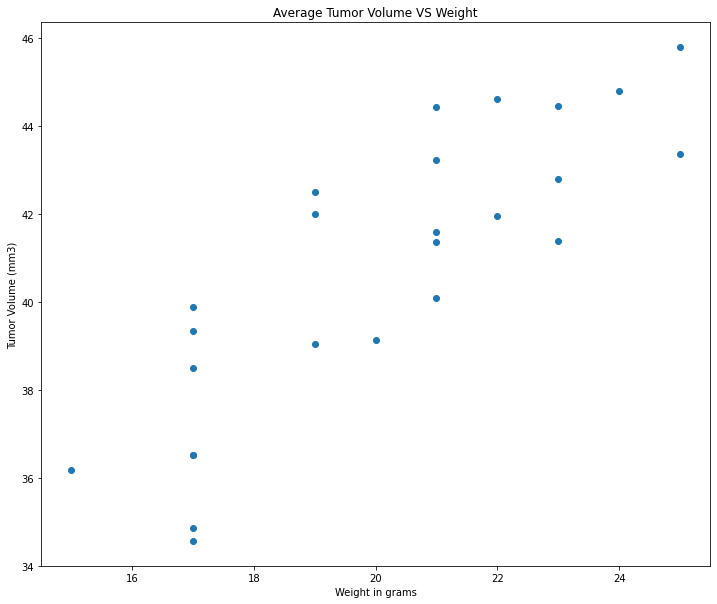

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_full = mouse_indcln.loc[lambda mouse_indcln: mouse_indcln['drug_reg'] == "Capomulin"]

#Get mean tumor volume and weight of mice

cfy_axis1 = capomulin_full.groupby('m_id').agg({'tumorvol_mm3':['mean']})
cfx_axis1 = capomulin_full.groupby('m_id').agg({'weight_g':['max']})

#Create axis

cfy_axis = (cfy_axis1.tumorvol_mm3.values)
cfx_axis = (cfx_axis1.weight_g.values)

#Create Scatter Plot

plt.figure(figsize=(12,10))
plt.scatter(cfx_axis, cfy_axis)
plt.xlabel('Weight in grams')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume VS Weight')
plt.show()


In [25]:
cfx_axis.shape

(25, 1)

## Correlation and Regression

The r-squared is: 0.7088568047708717
The Linear Regression model is: y = 0.95x + 21.55


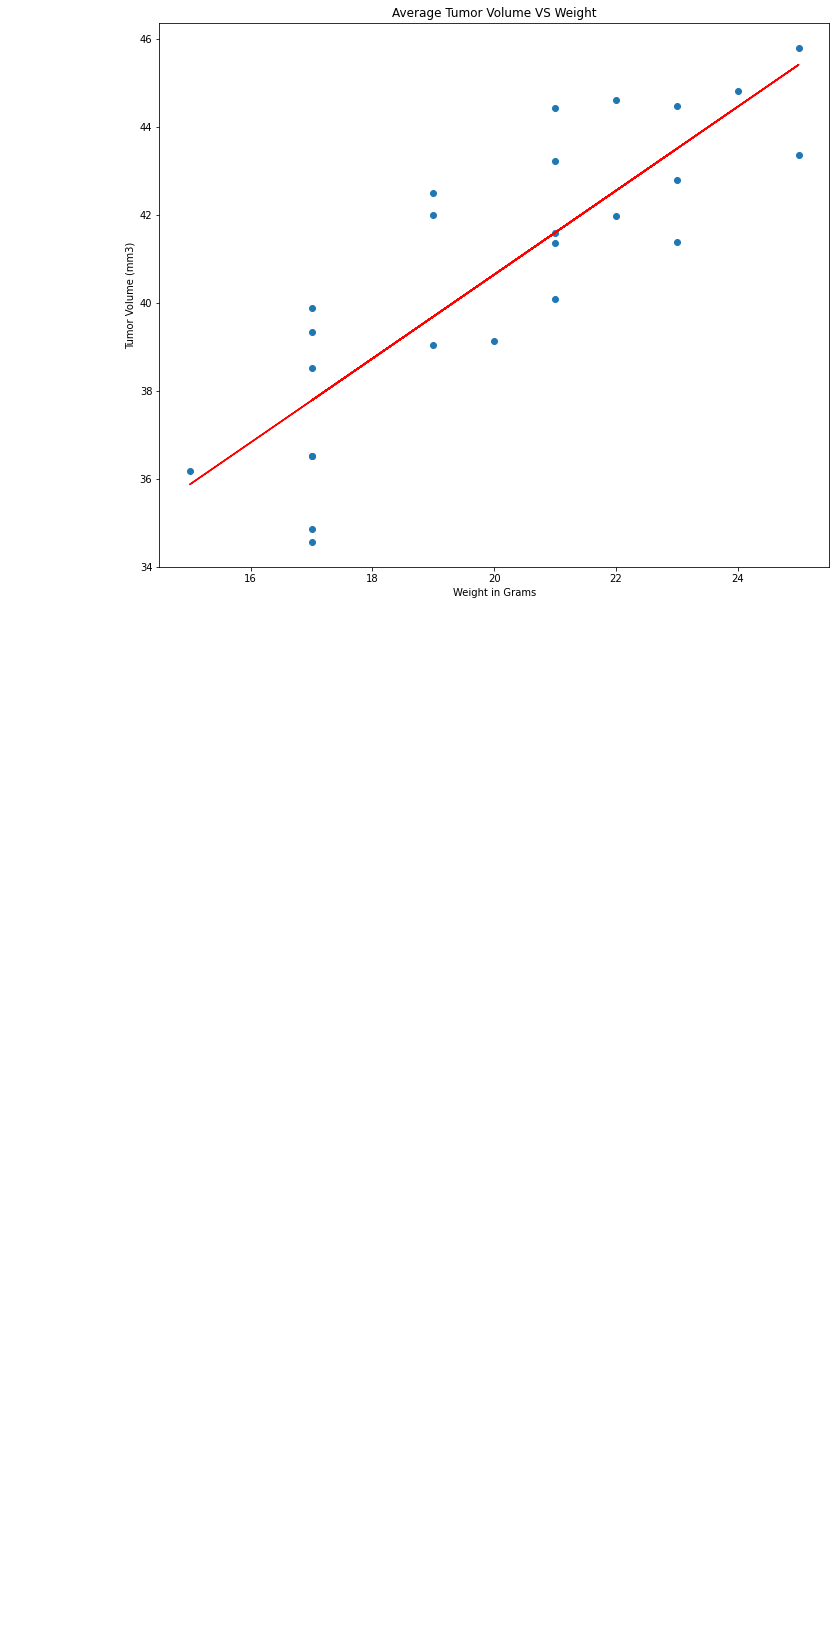

In [26]:
# Calculate the correlation coefficient and linear regression model -
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = cfx_axis[:,0]
y_values = cfy_axis[:,0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume VS Weight')
print(f"The r-squared is: {rvalue**2}")
print(f"The Linear Regression model is: {line_eq}")
plt.show()